In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Attendance_Prediction.csv')
df

,student_id,age,gender,course,year,parent_education,internet_access,hostel_resident,class_type,weather,study_hours,sleep_hours,travel_time_minutes,attendance,absence_reason
0,200.99,17,male,pharmacy,1st year,high school,no,yes,offline,sunny,3.63,7.24,31,1,none
1,200.99,23,other,diploma,2nd year,high school,yes,yes,offline,cloudy,4.39,7.98,50,0,no reason
2,200.99,22,male,b.sc,3rd year,no formal,yes,yes,online,rainy,5.43,6.53,62,1,none
3,200.99,20,other,pharmacy,2nd year,no formal,yes,yes,offline,cloudy,0.21,7.11,63,0,personal work
4,200.99,20,female,pharmacy,1st year,no formal,yes,yes,online,sunny,1.77,9.35,81,0,project work
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19800.01,18,other,bca,4th year,phd,yes,yes,offline,hot,3.10,4.78,25,0,none
19996,19800.01,18,male,ba,3rd year,no formal,yes,no,offline,cloudy,4.95,7.49,68,1,none
19997,19800.01,19,other,pharmacy,2nd year,graduate,yes,yes,offline,rainy,1.01,9.29,72,0,project work
19998,19800.01,19,male,bca,1st year,no formal,yes,no,offline,cold,1.52,7.66,33,0,personal work


In [3]:
# 2. Initial Inspection
print("--- Data Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Duplicates ---")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# 3. Summary Statistics
print("\n--- Numerical Summary ---")
print(df.describe())
print("\n--- Categorical Summary ---")
print(df.describe(include=['O']))

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           20000 non-null  float64
 1   age                  20000 non-null  int64  
 2   gender               20000 non-null  object 
 3   course               20000 non-null  object 
 4   year                 20000 non-null  object 
 5   parent_education     20000 non-null  object 
 6   internet_access      20000 non-null  object 
 7   hostel_resident      20000 non-null  object 
 8   class_type           20000 non-null  object 
 9   weather              20000 non-null  object 
 10  study_hours          20000 non-null  float64
 11  sleep_hours          20000 non-null  float64
 12  travel_time_minutes  20000 non-null  int64  
 13  attendance           20000 non-null  int64  
 14  absence_reason       20000 non-null  object 
dtypes: float64(3), int

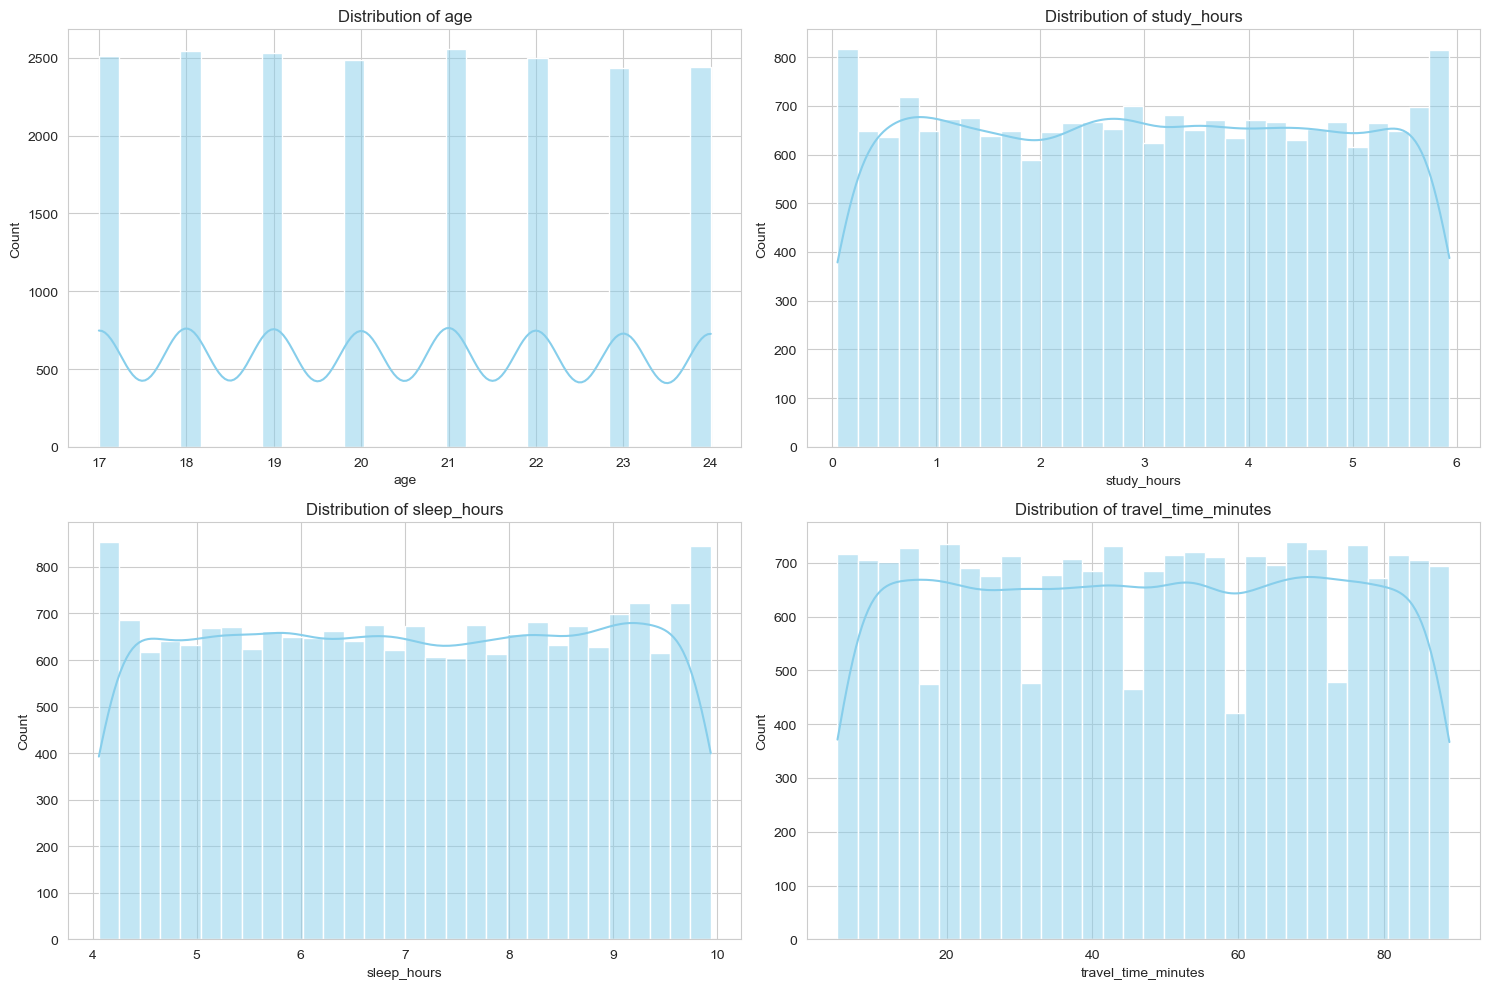

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\2918578555.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\2918578555.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\2918578555.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, pa

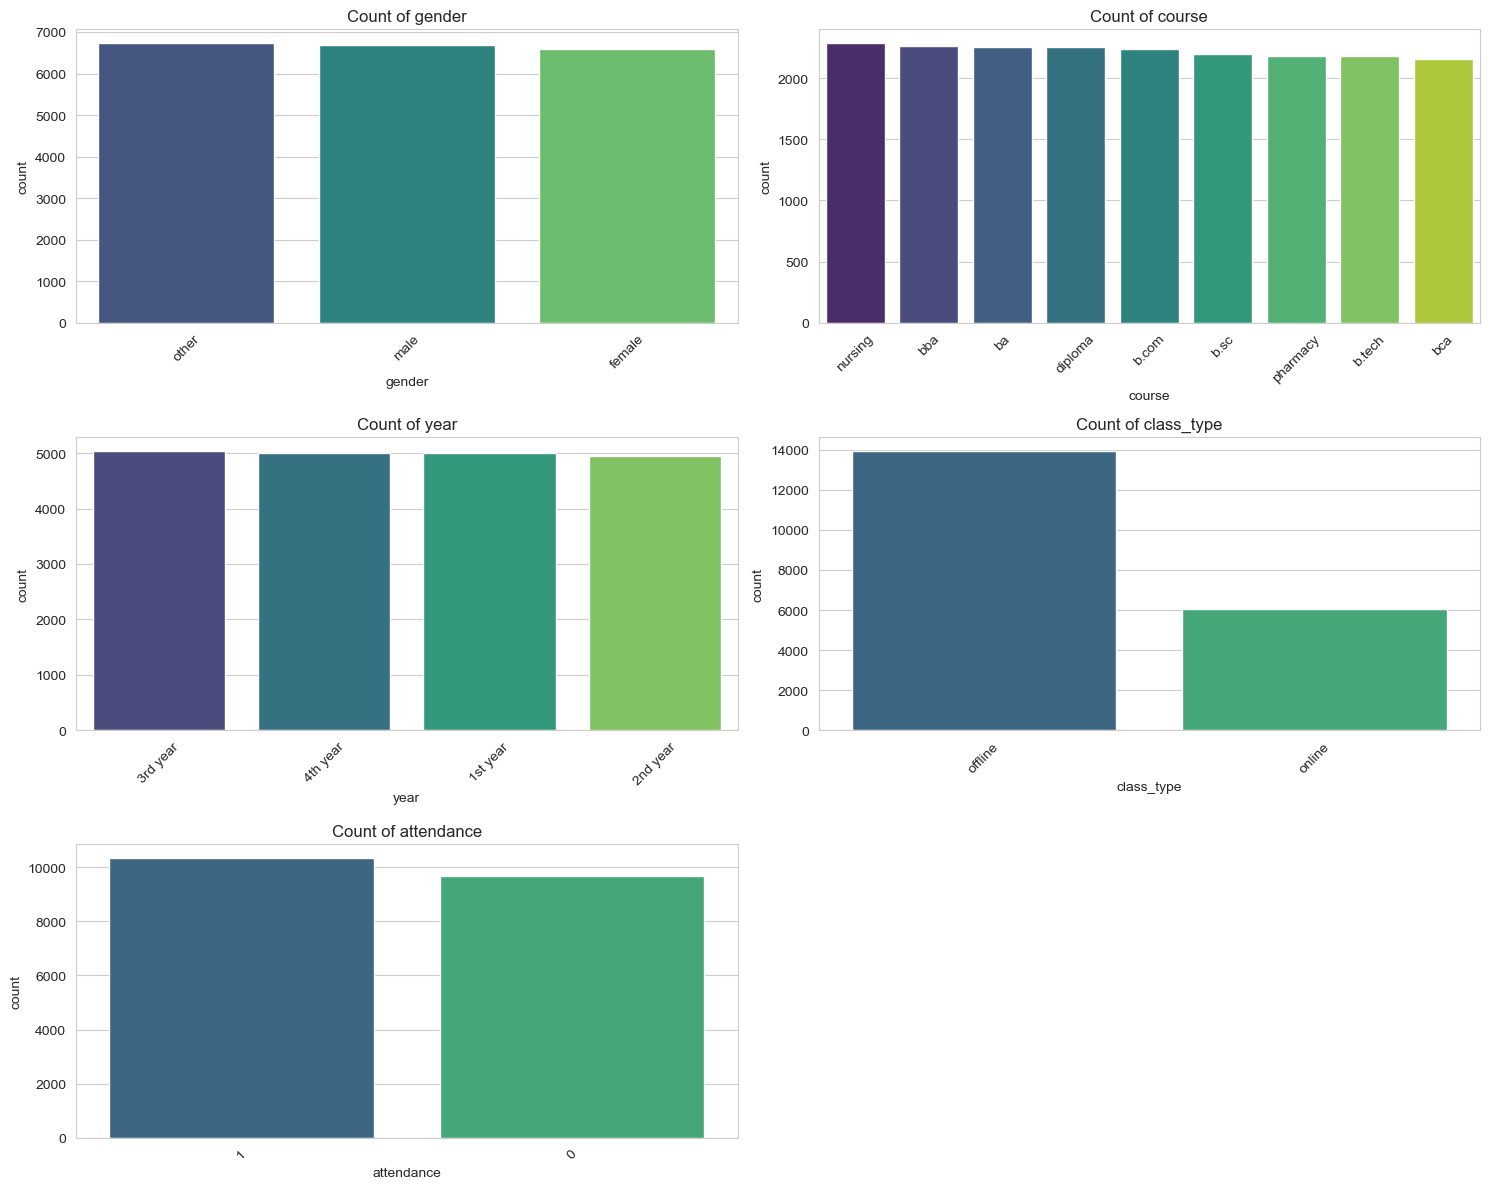

In [4]:
# 4. Data Visualization
sns.set_style("whitegrid")

# 4.1 Numerical Distributions
numerical_cols = ['age', 'study_hours', 'sleep_hours', 'travel_time_minutes']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 4.2 Categorical Counts
categorical_cols = ['gender', 'course', 'year', 'class_type', 'attendance']
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

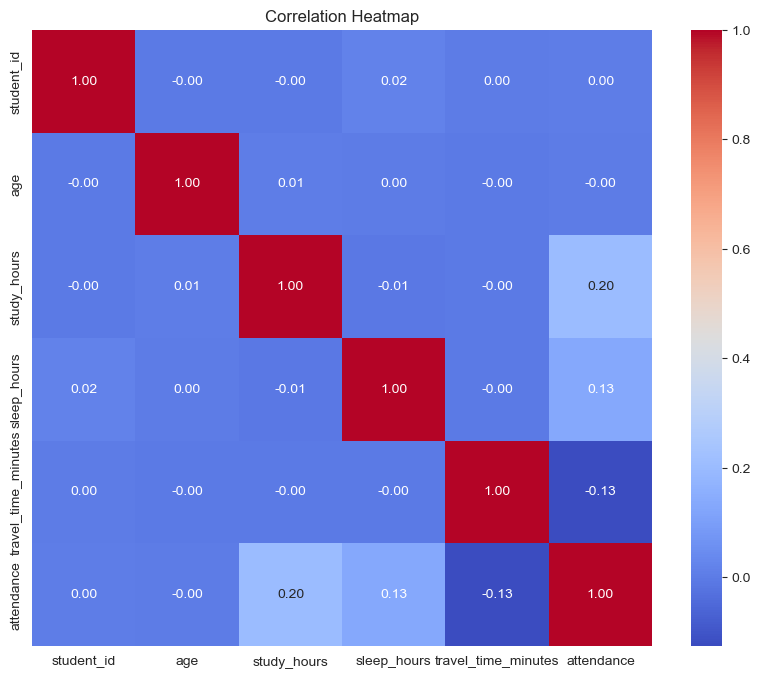

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\3072881083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attendance', y='study_hours', data=df, palette='Set2')


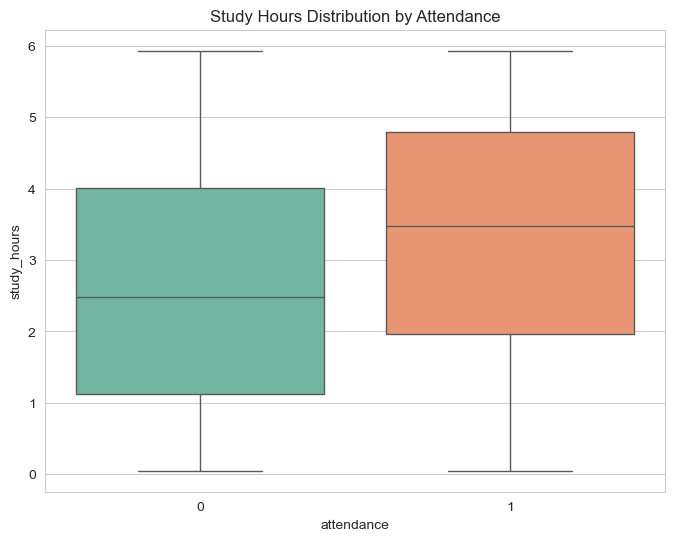

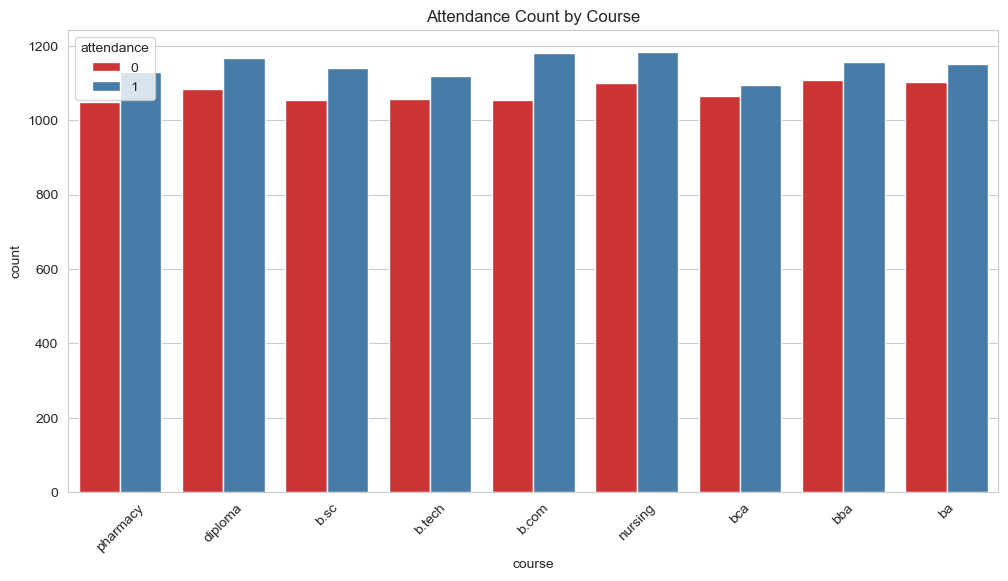

In [5]:
# 4.3 Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 4.4 Bivariate Analysis: Attendance vs Study Hours
plt.figure(figsize=(8, 6))
sns.boxplot(x='attendance', y='study_hours', data=df, palette='Set2')
plt.title('Study Hours Distribution by Attendance')
plt.show()

# 4.5 Bivariate Analysis: Attendance by Course
plt.figure(figsize=(12, 6))
sns.countplot(x='course', hue='attendance', data=df, palette='Set1')
plt.title('Attendance Count by Course')
plt.xticks(rotation=45)
plt.show()

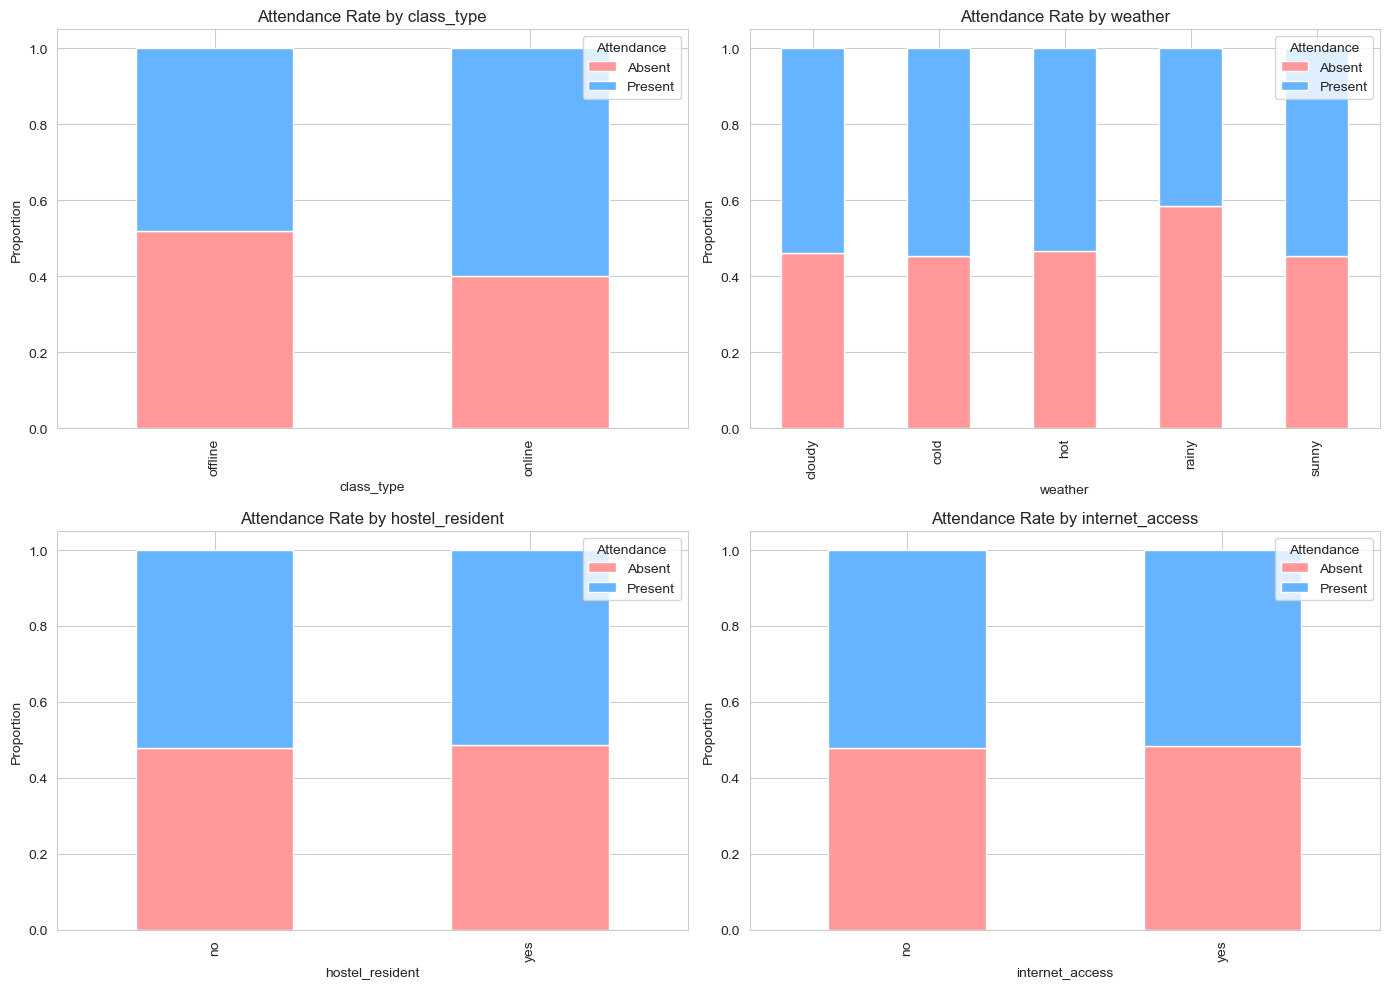

In [6]:
# 1. Proportional Analysis (Stacked Bar Charts)
# Shows the % of attendance within each group
cat_features = ['class_type', 'weather', 'hostel_resident', 'internet_access']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    props = df.groupby(feature)['attendance'].value_counts(normalize=True).unstack()
    props.plot(kind='bar', stacked=True, ax=axes[i], color=['#ff9999','#66b3ff'])
    axes[i].set_title(f'Attendance Rate by {feature}')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Attendance', labels=['Absent', 'Present'], loc='upper right')

plt.tight_layout()
plt.show()

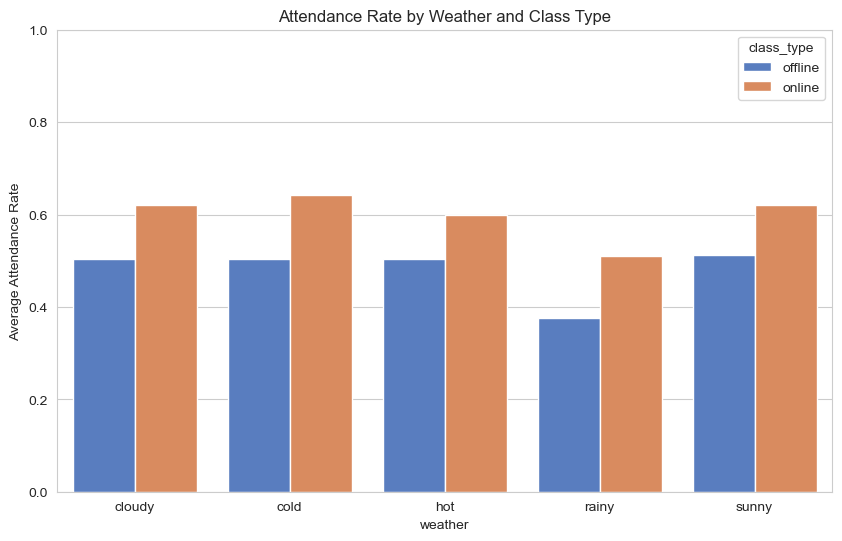

In [7]:
# 2. Interaction: Weather vs Class Type
# This is crucial: Does weather affect online/offline differently?
plt.figure(figsize=(10, 6))
interaction_data = df.groupby(['weather', 'class_type'])['attendance'].mean().reset_index()
sns.barplot(x='weather', y='attendance', hue='class_type', data=interaction_data, palette='muted')
plt.title('Attendance Rate by Weather and Class Type')
plt.ylabel('Average Attendance Rate')
plt.ylim(0, 1)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\866877219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='absence_reason', data=absent_df,


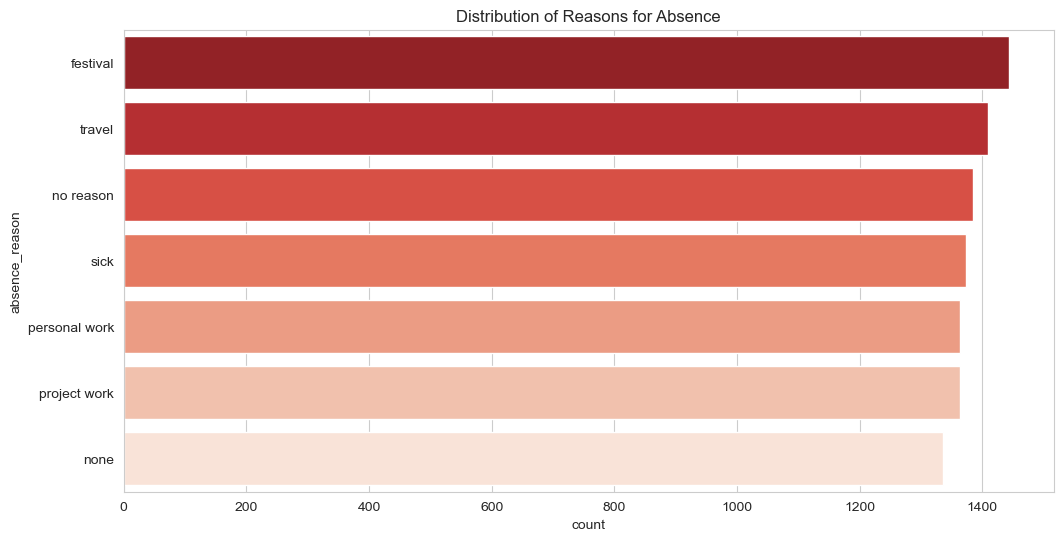

In [8]:
# 3. Absence Reason Analysis
# Filter only for absent students to see their reasons
absent_df = df[df['attendance'] == 0]
plt.figure(figsize=(12, 6))
sns.countplot(y='absence_reason', data=absent_df, 
              order=absent_df['absence_reason'].value_counts().index, palette='Reds_r')
plt.title('Distribution of Reasons for Absence')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28732\4167952958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='attendance', y='travel_time_minutes', data=df, palette='Set3')


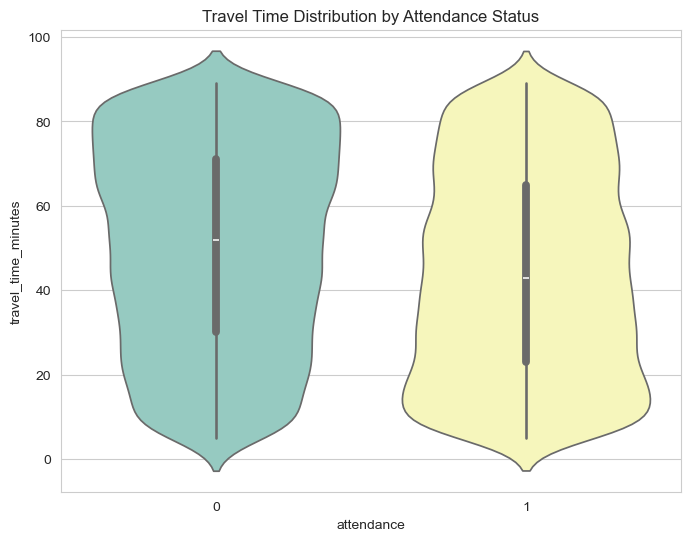

In [9]:
# 4. Travel Time Impact (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='attendance', y='travel_time_minutes', data=df, palette='Set3')
plt.title('Travel Time Distribution by Attendance Status')
plt.show()

In [ ]:
from scipy import stats

print("--- Statistical Hypothesis Testing ---")

# T-Test: Do students who attend study significantly more than those who don't?
# Null Hypothesis: Mean study hours are the same for both groups.
attended_study = df[df['attendance'] == 1]['study_hours']
absent_study = df[df['attendance'] == 0]['study_hours']

t_stat, p_val = stats.ttest_ind(attended_study, absent_study)
print(f"\n1. T-test (Study Hours vs Attendance):")
print(f"   T-statistic: {t_stat:.4f}")
print(f"   P-value: {p_val:.4e}")
if p_val < 0.05:
    print("   Result: Significant difference found (Reject Null Hypothesis)")
else:
    print("   Result: No significant difference found")

# Chi-Square Test: Is attendance dependent on weather?
# Null Hypothesis: Weather and Attendance are independent.
contingency_table = pd.crosstab(df['weather'], df['attendance'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\n2. Chi-square Test (Weather vs Attendance):")
print(f"   Chi2 Statistic: {chi2:.4f}")
print(f"   P-value: {p_chi:.4e}")
if p_chi < 0.05:
    print("   Result: Significant dependency found (Weather impacts Attendance)")
else:
    print("   Result: No dependency found")

--- Statistical Hypothesis Testing ---

1. T-test (Study Hours vs Attendance):
   T-statistic: 29.1277
   P-value: 1.0336e-182
   Result: Significant difference found (Reject Null Hypothesis)

2. Chi-square Test (Weather vs Attendance):
   Chi2 Statistic: 203.5139
   P-value: 6.5969e-43
   Result: Significant dependency found (Weather impacts Attendance)
